<a href="https://colab.research.google.com/github/maoya23/Generative-Model-bigginer/blob/main/Lesson2_MaximumLikelihoodEstimation_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 生成モデルを理解する lesson2

### Chapter1 : 尤度関数

生成モデルは以下の2ステップを踏む

1. 推定する母集団の分布を仮定する
1. 仮定した分布のパラメータを推定する
1. 推定した分布からデータを持ってくる

この時、パラメータを推定するのによく使われるのが最尤推定法

最尤推定は尤度関数$p(Y|X)$を最大化することにより得られる。

</br>
尤度関数とは、Xが与えられたときのYのとりえる確率であり、xをパラメータとするとパラメータの分布への当てはまりの良さとも言える。

### Chapter2 : データの読み込み

- 般的に身長は正規分布に従うとされてるので、実測データを元に最尤推定をやってみる

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv', index_col=False)
df = df[ 'height']


Text(0, 0.5, 'probability density')

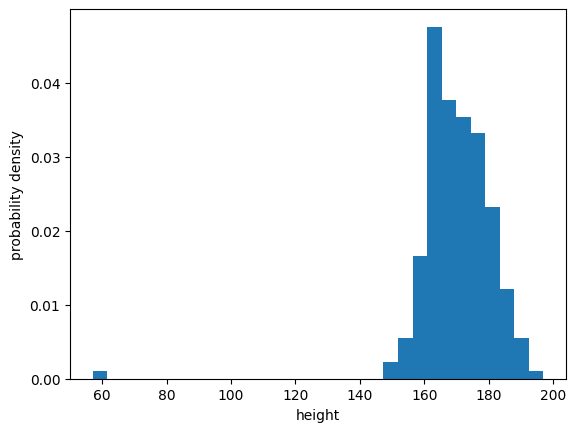

In [ ]:
plt.hist(df,bins='auto',density=True)
plt.xlabel('height')
plt.ylabel('probability density')

- 外れ値消しましょう


In [ ]:
df=df[df>140]

Text(0, 0.5, 'probability density')

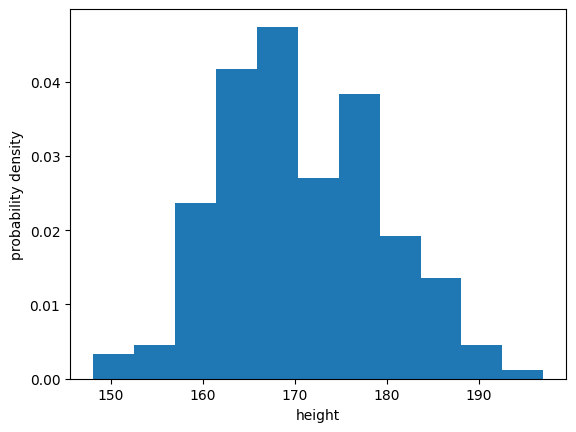

In [ ]:
plt.hist(df,bins='auto',density=True)
plt.xlabel('height')
plt.ylabel('probability density')

### Chapter3 : 最尤推定の実行

実際に最尤推定をやってみる。</br>
- 平均はサンプル平均
- 標準偏差はサンプル標準偏差

で得られる

詳しくは
[最尤推定・最尤法](https://datachemeng.com/wp-content/uploads/2017/08/maximumlikelihoodestimation.pdf)

In [ ]:
import numpy as np

#平均と分散を計算して表示する
mu=np.mean(df)
sigma=np.std(df)

print(mu,sigma)

170.58793969849245 8.9263347763277


Text(0, 0.5, 'probability debsity')

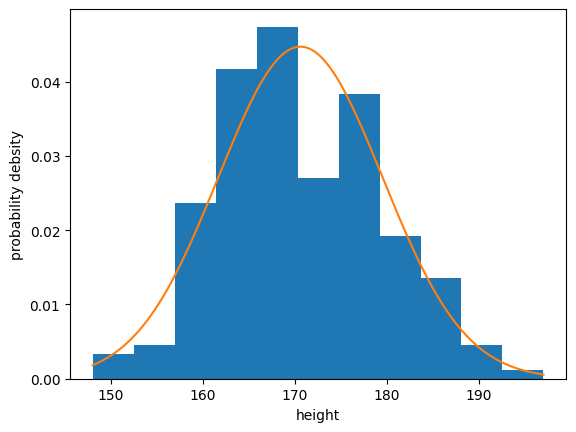

In [ ]:
# 正規分布を推定してみる


def normal(x,mu,sigma):
  return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))

x=np.linspace(min(df),max(df),1000)
y=normal(x,mu,sigma)

#グラフの描画
plt.hist(df,bins='auto',density=True)
plt.plot(x,y)
plt.xlabel('height')
plt.ylabel('probability debsity')

## Chapter4 : データの生成

さて、母集団の分布を推定したので、推定した母集団からサンプリングすることで新たなデータを得ることができる

In [ ]:
#サンプリングの実行
sample=np.random.normal(mu,sigma,len(df))

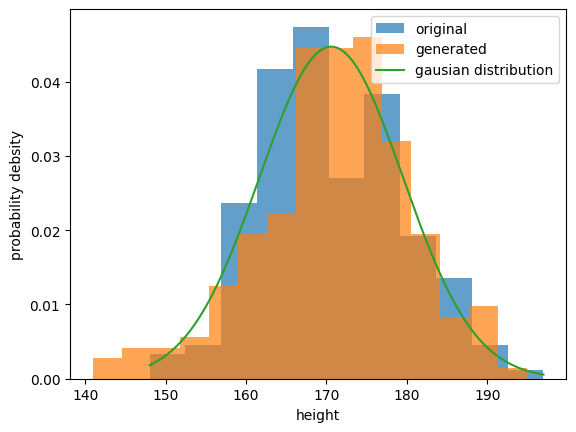

In [ ]:
plt.hist(df,bins='auto',density=True,alpha=0.7,label='original')
plt.hist(sample,bins='auto',density=True,alpha=0.7,label='generated')
plt.plot(x,y,label='gausian distribution')
plt.xlabel('height')
plt.ylabel('probability debsity')
plt.legend()

## 演習

教科書のデータを使って再現してみる

In [ ]:
import numpy as np
import requests

url = 'https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch-5/main/step02/height.txt'
response = requests.get(url)
response.raise_for_status()

xs = np.loadtxt(response.text.splitlines(), dtype=float)

In [ ]:
print(xs)

[167.089607 181.648633 176.2728   ... 164.334317 171.524117 174.949129]


Text(0, 0.5, 'frequency')

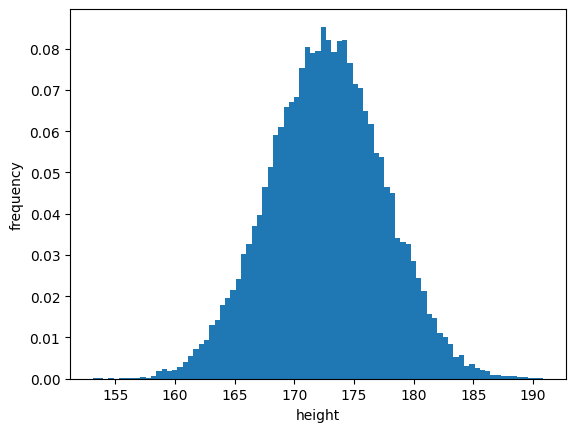

In [ ]:
import matplotlib.pyplot as plt

plt.hist(xs,bins="auto",density=True)
plt.xlabel("height")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

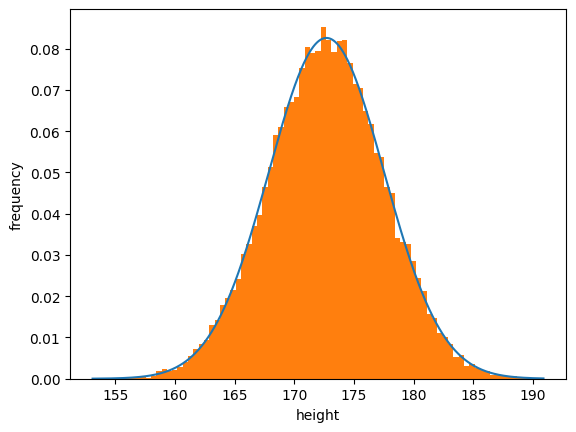

In [ ]:
n=len(xs)
muest=np.mean(xs)
sigest=np.std(xs)

def N(m,s,x):
  return np.exp(-((x-m)**2)/(2*s**2))/(s*np.sqrt(2*np.pi))

x=np.linspace(min(xs),max(xs),1000)
y=N(muest,sigest,x)

plt.plot(x,y)
plt.hist(xs,bins="auto",density=True)
plt.xlabel("height")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

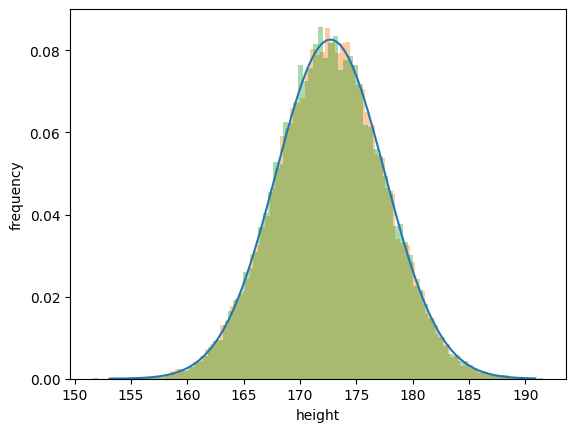

In [ ]:
Sample=np.random.normal(muest,sigest,n)

plt.plot(x,y)
plt.hist(xs,bins="auto",density=True,alpha=0.4)
plt.hist(Sample,bins="auto",density=True,alpha=0.4)
plt.xlabel("height")
plt.ylabel("frequency")